In [1]:
import pandas as pd
import requests
import seaborn as sns
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import datetime

In [3]:
url = 'https://worldtable.info/gosudarstvo/tablica-rozhdaemosti-po-godam-rossija.html'   
    
HOST = 'https://worldtable.info/gosudarstvo/tablica-rozhdaemosti-po-godam-rossija.html'

HEADERS = {
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_6) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/13.1.2 Safari/605.1.15',
}

r = requests.get(url, headers=HEADERS)
soup = BeautifulSoup(r.text, 'html.parser')


table_birth = soup.find('div', class_='item-description').find_all('td')

In [23]:
lst_df_year = []
lst_df_birth = []

for i in range(len(table_birth)):
    if i % 2 == 0:
        lst_df_year.append(pd.DataFrame(table_birth[i]))
    else:
        lst_df_birth.append(pd.DataFrame(table_birth[i]))

        
df_year = pd.concat(lst_df_year).reset_index()
df_year = df_year.drop('index', axis=1)
df_birth = pd.concat(lst_df_birth).reset_index()
df_birth = df_birth.drop('index', axis=1)
df = pd.merge(df_year, df_birth, left_index=True, right_index=True)
df.columns = ['year', 'birth']
df = df.drop([0])
df['year'] = df['year'].apply(lambda x: str(x))
df['birth'] = df['birth'].apply(lambda x: int(x.replace(' ', '')))
df['year'] = pd.to_datetime(df['year']).dt.year
df.to_excel('/Users/dmitrydeykalo/Desktop/Тестовые/Сравни ру/df.xlsx')

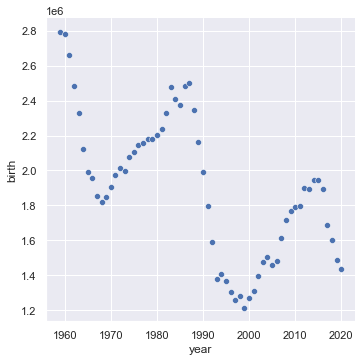

In [24]:
sns.set(rc={'figure.figsize':(25, 25)})
sns.relplot(x='year', y="birth", data=df)